### Graded Lab 3

Hello ! Welcome to Graded Lab of Module 3.

Working on the same analysis task.

* Here we will work on correlations between variables , testing few of the hypothesis business wants us to test.

In case if you are not able to recollect the problem description and data description then mentioning it below.

Lets look at the problem statement,

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answers to different questions asked by company officials.

# Instructor update: Dec 14, 2023

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from itertools import combinations
from scipy import stats
from statsmodels.stats import weightstats as ztests


### Reading sales data
sales = pd.read_csv('sales_data.csv')

### Reading customer data
cust = pd.read_csv(r'customers.csv',encoding='iso-8859-1')

### Reading vendor data
vend = pd.read_csv(r'vendors.csv')

sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005


In order to solve the next questions , we need to combine all the 3 datasets into a single dataframe such that every details of sales dataframe are intact. So here we have written a data processing function.
There are 2 tasks which are to be performed.
1. Merge/ Join all the 3 datasets into a single dataframe such that every details of sales dataframe are intact. (Understand which should be the joining key , type of join , refer .merge() function of pandas)
2. Convert 'order_date' into a datetime column.
**Return output as a dataframe**

In [2]:
#### data_merging & order_date processing , data1 will be sales , data2 will be customer dataset & data3 will be vendor dataset.

def data_process(data1,data2,data3):
    
    # Merge data1 and data2 on 'customer_id'

    data = pd.merge(data1, data2, on='customer_id', how='left')

    # Merge the result with data3 on 'vendor_code'

    data = pd.merge(data, data3, on='vendor_code', how='left')

    # Convert 'order_date' into a datetime column

    data['order_date'] = pd.to_datetime(data['order_date'])

    return data

In [3]:
sales= data_process(data1=sales.copy(),data2=cust.copy(),data3=vend.copy())

In [4]:
assert sales['order_date'].dtypes=='<M8[ns]' ,'Make sure that you have converted order_date into a datetime format correctly.'
assert sales.shape== (51290,26) ,'Checking size and shape of dataframe after merging is a very important check.'

In [5]:
sales['order_date'].dtypes

dtype('<M8[ns]')

In [6]:
sales.shape

(51290, 26)

### Q1. What is skewness,skewness type ,kurtosis, kurtosis type for profit column ? 
#### Return output in tuple format.Eg :- (-1, "Left-skewed", 2, "Platykurtic"). Make sure to round off answer to 2 decimals.


Note:-
1. Skewness type takes 3 values :- Right-skewed (Skewness >0) ,Left-skewed (Skewness <0), Symmetric (Skewness = 0)
2. Kurtosis type takes 3 values :- Platykurtic (kurtosis < 3) ,Leptokurtic (kurtosis > 3), Mesokurtic (kurtosis = 3)

In [7]:
def skew_kurt(data,column):
    
    # Extract the column
    column_data = data[column]
    
    # Calculate skewness and kurtosis
    skewness = round(column_data.skew(), 2)
    kurtosis = round(column_data.kurtosis(), 2)
    
    # Determine skewness type
    if skewness > 0:
        skewness_type = "Right-skewed"
    elif skewness < 0:
        skewness_type = "Left-skewed"
    else:
        skewness_type = "Symmetric"

    # Determine kurtosis type
    if kurtosis > 3:
        kurtosis_type = "Leptokurtic"
    elif kurtosis < 3:
        kurtosis_type = "Platykurtic"
    else:
        kurtosis_type = "Mesokurtic"

    return (skewness, skewness_type, kurtosis, kurtosis_type)

In [8]:
assert type(skew_kurt(data=sales,column='profit'))==tuple, "Please provide output in a tuple format."
assert len(skew_kurt(data=sales,column='profit'))==4,"Please include skewness , skewness_type , kurtosis & kurtosis_type."
assert skew_kurt(data=sales,column='profit')[1] in ["Right-skewed","Left-skewed","Symmetric"],"Please include from the listed types only , also make sure that spelling is correct."
assert skew_kurt(data=sales,column='profit')[3] in ["Platykurtic","Leptokurtic","Mesokurtic"],"Please include from the listed types only , also make sure that spelling is correct."

In [9]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

In [10]:
skew_kurt(data=sales,column='profit')

(4.16, 'Right-skewed', 291.41, 'Leptokurtic')

In [11]:
type(skew_kurt(data=sales,column='profit'))

tuple

In [12]:
len(skew_kurt(data=sales,column='profit'))

4

In [13]:
skew_kurt(data=sales,column='profit')[1]

'Right-skewed'

In [14]:
skew_kurt(data=sales,column='profit')[3]   ### PASSED

'Leptokurtic'

### Q2.	What is correlation between different numerical variables ? ('sales', 'quantity', 'discount', 'profit', 'shipping_cost')
### Return a dataframe with 3 columns : Variable 1 , Variable 2 , Correlation. 
### Round off correlation values upto 4 decimals.
### Sort dataframe with respect to highest absolute correlation & make sure that one variable pair occurs only once. For eg : (Col A , Col B) has occured then (Col B , Col A) cant occur.

In [15]:
def corr_sales(data):
    
    # Extracting relevant numerical columns
    numerical_columns = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']
    numerical_data = data[numerical_columns]
    
    # Calculate correlation matrix
    corr_matrix = numerical_data.corr()

    # Extracting variable pairs and corresponding correlations
    variable_pairs = []
    correlations = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            variable_1 = corr_matrix.columns[i]
            variable_2 = corr_matrix.columns[j]
            correlation = round(corr_matrix.iloc[i, j], 4)

            variable_pairs.append((variable_1, variable_2))
            correlations.append(correlation)
            
    # Create DataFrame
    pair_df = pd.DataFrame({'variable_1': [pair[0] for pair in variable_pairs],
                            'variable_2': [pair[1] for pair in variable_pairs],
                            'corr': correlations}) 
    
    # Sort DataFrame by absolute correlation in descending order
    pair_df = pair_df.reindex(pair_df['corr'].abs().sort_values(ascending=False).index)
    
    return pair_df[['variable_1','variable_2','corr']]

In [16]:
assert type(corr_sales(data=sales))==pd.DataFrame, "Please provide output in dataframe format."
assert all(corr_sales(data=sales).columns==['variable_1', 'variable_2', 'corr']), "Make sure your output columns are named as 'variable_1', 'variable_2', 'corr'."
assert corr_sales(data=sales).shape[1]==3, "Make sure you are returning only 3 columns."
assert corr_sales(data=sales).shape[0]==10, "Make sure you are returning all possible combinations."
assert list(corr_sales(data=sales)['corr'])[0]== 0.7681, "Please provide correct value , make sure that answer is rounded upto 4 digits."
assert list(corr_sales(data=sales)['corr'])[-1]== -0.0199, "Please provide correct value , make sure that answer is rounded upto 4 digits."

In [17]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

In [18]:
corr_sales(data=sales)

,variable_1,variable_2,corr
3,sales,shipping_cost,0.7681
2,sales,profit,0.4849
9,profit,shipping_cost,0.3544
7,discount,profit,-0.3165
0,sales,quantity,0.3136
6,quantity,shipping_cost,0.2726
5,quantity,profit,0.1044
1,sales,discount,-0.0867
8,discount,shipping_cost,-0.0791
4,quantity,discount,-0.0199


In [19]:
type(corr_sales(data=sales))

pandas.core.frame.DataFrame

In [20]:
corr_sales(data=sales).shape[1]

3

In [21]:
corr_sales(data=sales).shape[0]

10

In [22]:
list(corr_sales(data=sales)['corr'])[0]

0.7681

In [23]:
list(corr_sales(data=sales)['corr'])[-1]

-0.0199

### Q3.	 Plot a box plot for sales in 'Furniture' category and tell on which side of box-plot you were able to see outliers.

### Store the output in 'outliers_whiskers' variable. Output should be from one of the following choices : 'both_sides' , 'upper_whisker' ,'lower_whisker'. 

In [24]:
def outlier_sales(data):
    
    # Filter data for 'Furniture' category
    furniture_data = data[data['category'] == 'Furniture']
    
    # Plot box plot for sales
    plt.figure(figsize=(8, 6))
    plt.boxplot(furniture_data['sales'], vert=False)
    plt.title('Box Plot for Sales in Furniture Category')
    plt.xlabel('Sales')
    
    # Determine the position of outliers
    outliers_whiskers = None
    if len(plt.boxplot(furniture_data['sales'], vert=False)['fliers'][0].get_data()[0]) > 0:
        # If outliers are present
        if plt.boxplot(furniture_data['sales'], vert=False)['fliers'][0].get_data()[0][0] < plt.boxplot(furniture_data['sales'], vert=False)['whiskers'][0].get_data()[0][0]:
            outliers_whiskers = 'lower_whisker'
        else:
            outliers_whiskers = 'upper_whisker'
    else:
        outliers_whiskers = 'both_sides'
        
    plt.show()
    
    return outliers_whiskers # outlier_whsikers is a variable in where you will store answer selected from this 3 options : both_sides , upper_whisker , lower_whisker

In [25]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

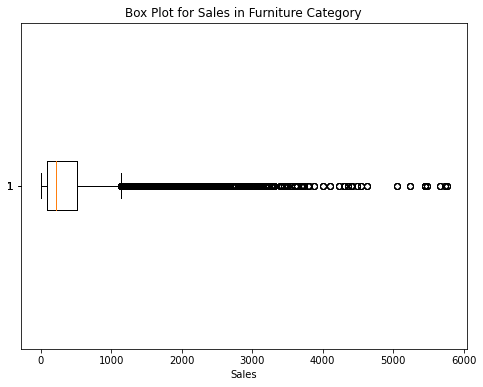

'upper_whisker'

In [26]:
outlier_sales(sales)   ### PASSED

### Q4.	What is probability that profit lies between 13 & 25.
Return output as float type (check if output dtype is numpy.float64) ,rounded upto 4 decimals.

In [27]:
def prob(data,lower_bound,upper_bound):
    
    # Calculate mean and standard deviation of profit
    mean_profit = data['profit'].mean()
    std_dev_profit = data['profit'].std()
    
    # Calculate z-scores for lower and upper bounds
    z_lower = (lower_bound - mean_profit) / std_dev_profit
    z_upper = (upper_bound - mean_profit) / std_dev_profit
    
    # Calculate probabilities using the cumulative distribution function (CDF)
    prob_lower = norm.cdf(z_lower)
    prob_upper = norm.cdf(z_upper)

    # Calculate the probability that profit lies between lower and upper bounds
    probability = prob_upper - prob_lower
    
    return np.round(probability, 4)

In [28]:
assert type(prob(data=sales,lower_bound=13,upper_bound=25))==np.float64, 'Make sure that you are returning output as float64 (check if output dtype is numpy.float64) type , it should be rounded up to 4 decimals.'
assert (prob(data=sales,lower_bound=13,upper_bound=25)>=0) & (prob(data=sales,lower_bound=13,upper_bound=25)<=1), 'Remember probability always lies between 0 to 1.'

In [29]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.


In [30]:
prob(data=sales,lower_bound=13,upper_bound=25)

0.0274

In [31]:
type(prob(data=sales,lower_bound=13,upper_bound=25))  ### PASSED

numpy.float64

###  Q.5) Company's Sales team found an interesting insight from past study. Study said that on a 3-yr scale  avg quantities sold comes out to be 3. Now they want to test if the average quantities sold number has increased or not i.e they wish to understand if average quantities sold are greater than a previously known value i.e 3 or not , Our data is on  3 yrs horizon. So they have asked you to draw a sample of size 100 from sales data, analyze and report findings. Select alpha (level of significance) as 0.05.

**Return output as tuple consisting of  (statistics_value, p-value, decision). Make sure to round up statistics_value & p-value to 4 decimals. Your code will be tested on an input sample (sample_1).**


For eg :- (1.267,0.045,'Reject Null hypothesis')

Where ,stastics:- It is calculated statistic from appropriate test.

p-value :- probability value

Decision :- You have to select from the 2 choices 'Reject Null Hypothesis' , 'Do not Reject Null Hypothesis''

**Hint:**

We are trying to test a hypothesis whether average quantities data for sales data are greater than previously known value 3 or not ?
In order to solve this problem , Think on the lines below.

H0: Average quantities sold = previously_known_population_value (3)

H1: Average quantities sold > previously_known_population_value (3) 

We will use 1 sample z-test with alernative type as 'larger'  for solving this problem.

In [32]:
# Please do not alter/ delete /edit this cell.

from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
import random
random.seed(9001)

sampleSize=100
group_A= sales['quantity']
sample_1 =  random.sample([x for x in group_A], sampleSize)

## sample for sold quantities is given as sample_1
print(f"length of sold 'quantity' sample is {len(sample_1)}")

length of sold 'quantity' sample is 100


In [33]:
assert np.mean(sample_1)==3.42 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."

In [34]:
def one_sample_ztest(sample1,alpha,popn_value):
    
    ## sample1(quantity) will be a list of values with length 100.
    
    """
    Perform one-sample z-test.

    Parameters:
    - sample1: List of values (sample data).
    - alpha: Level of significance.
    - popn_value: Population value to compare the sample mean against.

    Returns:
    Tuple: (statistics_value, p-value, decision).
    """
    # Assuming alpha is given as a decimal (e.g., 0.05)
    alpha = round(alpha, 4)
    
    # Perform one-sample z-test
    z_statistic, p_value = ztest(sample1, value=popn_value, alternative='larger')
    
    # Check the decision based on the p-value and alpha
    if p_value < alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
    
    # Convert statistics_value to numpy.float64
    z_statistic = np.float64(round(z_statistic, 4))

    # Convert p_value to numpy.float64
    p_value = np.float64(round(p_value, 4))

    return z_statistic, p_value, decision

In [35]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.

In [36]:
one_sample_ztest(sample1=sample_1, alpha=0.05, popn_value=3)   ### PASSED

(1.8498, 0.0322, 'Reject Null Hypothesis')

### Q.6)  Sales team is interested in knowing if furniture & office supply products sell equally or is there any differece between their sells so they ask us to draw a sample of size 22 from furniture & sample of size 25 from Office Supplies from sales dataset and report findings. Select alpha (level of significance) as 0.05.

**Return output as tuple consisting of (statistics_value, p-value, decision). Make sure that stastics,p-value are rounded upto 4 digits.Your code will be tested on 2 input samples (sample_1,sample_2).**

For eg :- (1.267,0.045,'Reject Null hypothesis')

Where ,stastics:- It is calculated statistic from chosen test.

p-value :- probability value

Decision :- 'Reject Null Hypothesis' , ''Do not Reject Null Hypothesis''



In [37]:
# Please do not alter/ delete /edit this cell.

import random
random.seed(9001)


sampleSize=22
group_A= sales[sales['category']=='Furniture']['sales']
sample_1 =  random.sample([x for x in group_A], sampleSize)



sampleSize=25
group_B= sales[sales['category']=='Office Supplies']['sales']
sample_2 =  random.sample([x for x in group_B], sampleSize)


## sample for Furniture sales is given as sample_1
print(f'length of Furniture sales sample is {len(sample_1)}')
## sample for Office Supply sales is given as sample_2
print(f'length of Office Supply sales sample is {len(sample_2)}')

length of Furniture sales sample is 22
length of Office Supply sales sample is 25


In [38]:
assert round(np.mean(sample_1),2)==367.13 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."
assert round(np.mean(sample_2),2)==92.96 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."

In [39]:
def hypo_test(sample1,sample2,alpha):
    ## sample1(furniture sales) will be a list of values with length 22.
    ## sample2(office supplies sales) will be a list of values with length 25.
    
    """
    Perform independent two-sample t-test for hypothesis testing.

    Parameters:
    - sample1: List of values (sample data for Furniture sales).
    - sample2: List of values (sample data for Office Supplies sales).
    - alpha: Level of significance.

    Returns:
    Tuple: (statistics_value, p-value, decision).
    """
    from scipy.stats import ttest_ind
    
    # Assuming alpha is given as a decimal (e.g., 0.05)
    alpha = round(alpha, 4)

    # Perform independent two-sample t-test
    statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)
    
    
    # Check the decision based on the p-value and alpha
    if p_value < alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Fail to Reject Null Hypothesis"
    
    # Convert statistics_value to numpy.float64
    statistic = np.float64(round(statistic, 4))
    # print(statistic.dtype)
    # Convert p_value to numpy.float64
    p_value = np.float64(round(p_value, 4))
    # print(p_value.dtype)
    
    # your code here
    return statistic, p_value, decision

In [40]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 1

In [41]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 2

In [42]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 2

In [43]:
hypo_test(sample1=sample_1,sample2=sample_2,alpha=0.05) ### PASSED

(3.4987, 0.0011, 'Reject Null Hypothesis')

## Great Job ! ! !
Business team is happy with your work they wish to test couple of more things & require your help.

### Q.7)  Sales team is interested in knowing if profits in EMEA & Africa region are same or not. Test the hypothesis. Select alpha (level of significance) as 0.05.

**Return output as tuple consisting of (statistics_value,p-value,decision). Make sure that stastics,p-value are rounded upto 4 digits.Your code will be tested on 2 input samples (sample_1,sample_2).**


For eg :- (1.267,0.045,'Reject Null hypothesis')

Where ,statistics_value:- It is calculated statistic from chosen test.

p-value :- probability value

Decision :- 'Reject Null Hypothesis' , ''Do not Reject Null Hypothesis''



In [44]:
# Please do not alter/ delete /edit this cell
import random
random.seed(9001)

sampleSize=500
group_A= sales[sales['region']=='EMEA']['profit']
sample_1 =  random.sample([x for x in group_A], sampleSize)

sampleSize=567
group_B= sales[sales['region']=='Africa']['profit']
sample_2 =  random.sample([x for x in group_B], sampleSize)

## sample for EMEA is given as sample_1
print(f'length of EMEA sample is {len(sample_1)}')
## sample for Africa is given as sample_2
print(f'length of Africa sample is {len(sample_2)}')

length of EMEA sample is 500
length of Africa sample is 567


In [45]:
assert round(np.mean(sample_1),2)==13.45 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."
assert round(np.mean(sample_2),2)==27.44 , "If the sales dataframe is not being created properly then sample mean will not match ,check the creation of sales datafarme again."

In [46]:
def hypo_test(sample1,sample2,alpha):
    ## sample_1 (EMEA region) will be a list of values with length 500.
    ## sample_2 (Africa region) will be a list of values with length 567.
    # Perform independent two-sample t-test
    statistic, p_value = stats.ttest_ind(sample1, sample2, equal_var=True)
    
    # Determine the decision based on p-value and alpha
    if p_value < alpha:
        decision = "Reject Null Hypothesis"
    else:
        decision = "Do not Reject Null Hypothesis"
    
    
    return round(statistic,4), round(p_value,4), decision

In [47]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 1

In [48]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 2

In [49]:
# autograder cells , please do not alter/ delete /edit this cell,Kindly ignore this cell.
### Hidden test 3

In [50]:
hypo_test(sample1=sample_1, sample2=sample_2, alpha=0.05)

(-1.8409, 0.0659, 'Do not Reject Null Hypothesis')

# 91/100 points earned